In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

data = pd.read_excel("WindPark VI.xlsx", index_col = 0, parse_dates = True)

# Exploratory Data Analysis


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123120 entries, 2016-01-01 00:00:00 to 2018-05-04 23:50:00
Data columns (total 44 columns):
WTG 1-Active power avg [kW]            122776 non-null float64
WTG 1-Ambient temperature avg [°C]     122776 non-null float64
WTG 1-Wind direction avg [°]           122776 non-null float64
WTG 1-Wind speed avg [m/s]             122776 non-null float64
WTG 10-Active power avg [kW]           122687 non-null float64
WTG 10-Ambient temperature avg [°C]    122687 non-null float64
WTG 10-Wind direction avg [°]          122687 non-null float64
WTG 10-Wind speed avg [m/s]            122687 non-null float64
WTG 11-Active power avg [kW]           122713 non-null float64
WTG 11-Ambient temperature avg [°C]    122713 non-null float64
WTG 11-Wind direction avg [°]          122713 non-null float64
WTG 11-Wind speed avg [m/s]            122713 non-null float64
WTG 2-Active power avg [kW]            122465 non-null float64
WTG 2-Ambient temperature avg [°C]  

Our data set contains the average values of active power, wind speed, ambient temperature, and wind direction for 11 wind turbines. 

In [158]:
data.head(5)

,WTG 1-Active power avg [kW],WTG 1-Ambient temperature avg [°C],WTG 1-Wind direction avg [°],WTG 1-Wind speed avg [m/s],WTG 10-Active power avg [kW],WTG 10-Ambient temperature avg [°C],WTG 10-Wind direction avg [°],WTG 10-Wind speed avg [m/s],WTG 11-Active power avg [kW],WTG 11-Ambient temperature avg [°C],WTG 11-Wind direction avg [°],WTG 11-Wind speed avg [m/s],WTG 2-Active power avg [kW],WTG 2-Ambient temperature avg [°C],WTG 2-Wind direction avg [°],WTG 2-Wind speed avg [m/s],WTG 3-Active power avg [kW],WTG 3-Ambient temperature avg [°C],WTG 3-Wind direction avg [°],WTG 3-Wind speed avg [m/s],WTG 4-Active power avg [kW],WTG 4-Ambient temperature avg [°C],WTG 4-Wind direction avg [°],WTG 4-Wind speed avg [m/s],WTG 5-Active power avg [kW],WTG 5-Ambient temperature avg [°C],WTG 5-Wind direction avg [°],WTG 5-Wind speed avg [m/s],WTG 6-Active power avg [kW],WTG 6-Ambient temperature avg [°C],WTG 6-Wind direction avg [°],WTG 6-Wind speed avg [m/s],WTG 7-Active power avg [kW],WTG 7-Ambient temperature avg [°C],WTG 7-Wind direction avg [°],WTG 7-Wind speed avg [m/s],WTG 8-Active power avg [kW],WTG 8-Ambient temperature avg [°C],WTG 8-Wind direction avg [°],WTG 8-Wind speed avg [m/s],WTG 9-Active power avg [kW],WTG 9-Ambient temperature avg [°C],WTG 9-Wind direction avg [°],WTG 9-Wind speed avg [m/s]
TimeStamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,254.8,-4.0,42.4,7.1,32.3,-4.0,47.4,4.1,243.1,-3.0,40.1,7.6,329.7,-6.0,38.5,8.1,-0.1,-5.0,33.2,7.0,5.4,-3.0,16.4,4.0,329.0,-4.0,38.7,8.4,225.7,-5.0,27.1,7.0,83.5,-4.0,21.8,5.4,-0.9,-3.0,9.7,4.1,44.9,-3.0,28.4,5.2
2016-01-01 00:10:00,212.8,-4.0,42.6,7.0,32.9,-4.0,40.6,4.3,224.0,-3.0,39.7,7.1,264.1,-6.0,36.5,7.2,0.0,-5.0,33.2,6.9,34.8,-3.0,16.0,4.3,307.1,-4.0,38.7,8.2,214.0,-5.0,26.3,7.3,71.0,-4.0,23.0,5.2,-1.1,-3.0,9.6,4.1,27.4,-3.0,27.7,5.0
2016-01-01 00:20:00,270.6,-4.0,40.5,7.4,35.8,-4.0,42.5,4.3,275.9,-3.0,40.8,7.6,346.6,-6.0,39.9,7.8,0.0,-5.0,34.0,7.1,35.5,-4.0,20.1,4.3,397.5,-4.0,40.3,8.8,251.9,-5.0,27.2,7.3,86.5,-4.0,23.6,5.5,3.8,-3.0,14.7,4.2,67.1,-3.0,25.5,5.6
2016-01-01 00:30:00,197.5,-4.0,44.0,6.7,16.3,-4.0,47.1,4.1,183.0,-4.0,43.5,6.7,230.6,-6.0,39.0,6.8,0.2,-5.0,32.8,6.3,13.0,-3.0,17.8,4.0,271.7,-4.0,39.4,8.0,198.8,-5.0,26.8,6.8,61.8,-4.0,20.0,5.1,-1.3,-3.0,13.6,3.9,14.6,-3.0,28.9,4.8
2016-01-01 00:40:00,191.7,-4.0,44.8,6.4,16.1,-4.0,45.2,4.0,171.7,-4.0,41.3,6.9,229.3,-6.0,37.0,6.8,0.3,-5.0,34.0,6.6,-0.7,-3.0,20.9,3.6,263.3,-4.0,41.0,7.6,183.3,-5.0,29.6,6.6,48.7,-4.0,22.1,4.9,-0.9,-3.0,13.7,3.8,-0.6,-3.0,30.7,4.2


The time interval of each row is ten minutes.

## Data Cleaning

In [159]:
data.isnull().sum()

WTG 1-Active power avg [kW]             344
WTG 1-Ambient temperature avg [°C]      344
WTG 1-Wind direction avg [°]            344
WTG 1-Wind speed avg [m/s]              344
WTG 10-Active power avg [kW]            433
WTG 10-Ambient temperature avg [°C]     433
WTG 10-Wind direction avg [°]           433
WTG 10-Wind speed avg [m/s]             433
WTG 11-Active power avg [kW]            407
WTG 11-Ambient temperature avg [°C]     407
WTG 11-Wind direction avg [°]           407
WTG 11-Wind speed avg [m/s]             407
WTG 2-Active power avg [kW]             655
WTG 2-Ambient temperature avg [°C]      655
WTG 2-Wind direction avg [°]            655
WTG 2-Wind speed avg [m/s]              655
WTG 3-Active power avg [kW]             641
WTG 3-Ambient temperature avg [°C]      641
WTG 3-Wind direction avg [°]            641
WTG 3-Wind speed avg [m/s]              641
WTG 4-Active power avg [kW]             395
WTG 4-Ambient temperature avg [°C]      395
WTG 4-Wind direction avg [°]    

There appear to be a number of null values. We are going to use the `interpolate()` method to replace them.

In [160]:
data.interpolate(inplace = True)
data.isnull().sum()

WTG 1-Active power avg [kW]            0
WTG 1-Ambient temperature avg [°C]     0
WTG 1-Wind direction avg [°]           0
WTG 1-Wind speed avg [m/s]             0
WTG 10-Active power avg [kW]           0
WTG 10-Ambient temperature avg [°C]    0
WTG 10-Wind direction avg [°]          0
WTG 10-Wind speed avg [m/s]            0
WTG 11-Active power avg [kW]           0
WTG 11-Ambient temperature avg [°C]    0
WTG 11-Wind direction avg [°]          0
WTG 11-Wind speed avg [m/s]            0
WTG 2-Active power avg [kW]            0
WTG 2-Ambient temperature avg [°C]     0
WTG 2-Wind direction avg [°]           0
WTG 2-Wind speed avg [m/s]             0
WTG 3-Active power avg [kW]            0
WTG 3-Ambient temperature avg [°C]     0
WTG 3-Wind direction avg [°]           0
WTG 3-Wind speed avg [m/s]             0
WTG 4-Active power avg [kW]            0
WTG 4-Ambient temperature avg [°C]     0
WTG 4-Wind direction avg [°]           0
WTG 4-Wind speed avg [m/s]             0
WTG 5-Active pow

In [161]:
data.describe()

,WTG 1-Active power avg [kW],WTG 1-Ambient temperature avg [°C],WTG 1-Wind direction avg [°],WTG 1-Wind speed avg [m/s],WTG 10-Active power avg [kW],WTG 10-Ambient temperature avg [°C],WTG 10-Wind direction avg [°],WTG 10-Wind speed avg [m/s],WTG 11-Active power avg [kW],WTG 11-Ambient temperature avg [°C],WTG 11-Wind direction avg [°],WTG 11-Wind speed avg [m/s],WTG 2-Active power avg [kW],WTG 2-Ambient temperature avg [°C],WTG 2-Wind direction avg [°],WTG 2-Wind speed avg [m/s],WTG 3-Active power avg [kW],WTG 3-Ambient temperature avg [°C],WTG 3-Wind direction avg [°],WTG 3-Wind speed avg [m/s],WTG 4-Active power avg [kW],WTG 4-Ambient temperature avg [°C],WTG 4-Wind direction avg [°],WTG 4-Wind speed avg [m/s],WTG 5-Active power avg [kW],WTG 5-Ambient temperature avg [°C],WTG 5-Wind direction avg [°],WTG 5-Wind speed avg [m/s],WTG 6-Active power avg [kW],WTG 6-Ambient temperature avg [°C],WTG 6-Wind direction avg [°],WTG 6-Wind speed avg [m/s],WTG 7-Active power avg [kW],WTG 7-Ambient temperature avg [°C],WTG 7-Wind direction avg [°],WTG 7-Wind speed avg [m/s],WTG 8-Active power avg [kW],WTG 8-Ambient temperature avg [°C],WTG 8-Wind direction avg [°],WTG 8-Wind speed avg [m/s],WTG 9-Active power avg [kW],WTG 9-Ambient temperature avg [°C],WTG 9-Wind direction avg [°],WTG 9-Wind speed avg [m/s]
count,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.00000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.00000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000
mean,212.303684,13.766882,123.498804,6.473370,172.021161,13.51209,156.153236,5.797869,185.525996,14.731697,162.628740,6.000693,206.596384,12.392467,125.361189,6.296322,206.401779,13.734377,136.425980,6.447905,159.027958,14.182724,169.300327,5.269092,203.707539,14.079512,133.329039,6.408975,188.122259,13.354321,151.383922,6.016327,147.270342,13.575341,143.55461,5.660827,150.562494,14.156831,224.630211,5.512908,153.249157,14.081494,183.256167,5.703744
std,277.620439,7.360741,101.992114,4.291353,252.365765,7.39784,122.502202,4.048464,260.395480,7.225391,122.233903,4.202526,272.239722,7.349819,108.564921,4.189492,274.688731,7.482299,116.377856,4.375636,247.695669,7.423472,131.248177,3.980633,275.338133,7.522436,113.700612,4.365797,268.970038,7.393985,126.706512,4.340723,244.083882,7.439404,131.35507,4.206281,236.209484,7.469212,119.549074,3.888780,236.013693,7.438974,126.482798,3.875567
min,-24.100000,-7.000000,0.000000,0.000000,-21.700000,-7.00000,-2200.600100,0.000000,-21.100000,-6.000000,0.000000,0.000000,-21.300000,-8.000000,0.000000,0.000000,-23.800000,-7.000000,0.000000,0.000000,-14.100000,-7.000000,-2968.700000,0.000000,-19.600000,-7.000000,-2456.800000,0.000000,-27.500000,-5.000000,-2968.700000,0.000000,-17.400000,-7.000000,-50.50000,0.000000,-23.300000,-7.000000,-2943.100100,0.000000,-16.800000,-7.000000,-1995.800000,0.000000
25%,0.000000,9.000000,29.600000,3.000000,-0.400000,8.00000,24.400000,2.600000,-0.200000,10.000000,29.000000,2.600000,0.000000,7.000000,21.800000,2.900000,-0.200000,8.000000,17.800000,2.800000,-0.300000,9.000000,20.900000,2.200000,-0.100000,9.000000,22.000000,2.900000,-0.200000,8.000000,17.100000,2.600000,-0.300000,8.000000,15.50000,2.400000,-0.400000,9.000000,148.800000,2.500000,-0.300000,9.000000,51.300000,2.700000
50%,77.900000,13.000000,96.800000,5.700000,47.200000,13.00000,168.500000,4.700000,57.100000,14.000000,173.000000,5.100000,75.000000,12.000000,135.644915,5.500000,72.150000,13.000000,159.900000,5.600000,36.000000,14.000000,171.500000,4.200000,67.400000,13.000000,152.200000,5.500000,54.1000

We can see that some of the columns have min/max values that don't make sense, e.g. negative power averages. We are going to replace those values with more sensible ones, by using the `clip()` function.

In [162]:
all_cols = data.columns

active_power_avg = ['WTG 1-Active power avg [kW]', 'WTG 10-Active power avg [kW]', 
       'WTG 11-Active power avg [kW]', 'WTG 2-Active power avg [kW]', 
       'WTG 3-Active power avg [kW]', 'WTG 4-Active power avg [kW]',
       'WTG 5-Active power avg [kW]', 'WTG 6-Active power avg [kW]',
       'WTG 7-Active power avg [kW]', 'WTG 8-Active power avg [kW]',
       'WTG 9-Active power avg [kW]']

wind_speed_avg = ['WTG 1-Wind speed avg [m/s]', 'WTG 10-Wind speed avg [m/s]', 
       'WTG 11-Wind speed avg [m/s]', 'WTG 2-Wind speed avg [m/s]', 
       'WTG 3-Wind speed avg [m/s]', 'WTG 4-Wind speed avg [m/s]',
       'WTG 5-Wind speed avg [m/s]', 'WTG 6-Wind speed avg [m/s]',
       'WTG 7-Wind speed avg [m/s]', 'WTG 8-Wind speed avg [m/s]',
       'WTG 9-Wind speed avg [m/s]']

wind_direction_avg = ['WTG 1-Wind direction avg [°]', 'WTG 10-Wind direction avg [°]', 
       'WTG 11-Wind direction avg [°]', 'WTG 2-Wind direction avg [°]', 
       'WTG 3-Wind direction avg [°]', 'WTG 4-Wind direction avg [°]',
       'WTG 5-Wind direction avg [°]', 'WTG 6-Wind direction avg [°]',
       'WTG 7-Wind direction avg [°]', 'WTG 8-Wind direction avg [°]',
       'WTG 9-Wind direction avg [°]']

ambient_temperature_avg = ['WTG 1-Ambient temperature avg [°C]', 'WTG 10-Ambient temperature avg [°C]', 
       'WTG 11-Ambient temperature avg [°C]', 'WTG 2-Ambient temperature avg [°C]', 
       'WTG 3-Ambient temperature avg [°C]', 'WTG 4-Ambient temperature avg [°C]',
       'WTG 5-Ambient temperature avg [°C]', 'WTG 6-Ambient temperature avg [°C]',
       'WTG 7-Ambient temperature avg [°C]', 'WTG 8-Ambient temperature avg [°C]',
       'WTG 9-Ambient temperature avg [°C]']

data[active_power_avg] = data[active_power_avg].clip(0, 850)
data[wind_speed_avg] = data[wind_speed_avg].clip(0, 30)
data[wind_direction_avg] = data[wind_direction_avg].clip(0, 360)
data[ambient_temperature_avg] = data[ambient_temperature_avg].clip(-10, 40)

In [163]:
data.describe()

,WTG 1-Active power avg [kW],WTG 1-Ambient temperature avg [°C],WTG 1-Wind direction avg [°],WTG 1-Wind speed avg [m/s],WTG 10-Active power avg [kW],WTG 10-Ambient temperature avg [°C],WTG 10-Wind direction avg [°],WTG 10-Wind speed avg [m/s],WTG 11-Active power avg [kW],WTG 11-Ambient temperature avg [°C],WTG 11-Wind direction avg [°],WTG 11-Wind speed avg [m/s],WTG 2-Active power avg [kW],WTG 2-Ambient temperature avg [°C],WTG 2-Wind direction avg [°],WTG 2-Wind speed avg [m/s],WTG 3-Active power avg [kW],WTG 3-Ambient temperature avg [°C],WTG 3-Wind direction avg [°],WTG 3-Wind speed avg [m/s],WTG 4-Active power avg [kW],WTG 4-Ambient temperature avg [°C],WTG 4-Wind direction avg [°],WTG 4-Wind speed avg [m/s],WTG 5-Active power avg [kW],WTG 5-Ambient temperature avg [°C],WTG 5-Wind direction avg [°],WTG 5-Wind speed avg [m/s],WTG 6-Active power avg [kW],WTG 6-Ambient temperature avg [°C],WTG 6-Wind direction avg [°],WTG 6-Wind speed avg [m/s],WTG 7-Active power avg [kW],WTG 7-Ambient temperature avg [°C],WTG 7-Wind direction avg [°],WTG 7-Wind speed avg [m/s],WTG 8-Active power avg [kW],WTG 8-Ambient temperature avg [°C],WTG 8-Wind direction avg [°],WTG 8-Wind speed avg [m/s],WTG 9-Active power avg [kW],WTG 9-Ambient temperature avg [°C],WTG 9-Wind direction avg [°],WTG 9-Wind speed avg [m/s]
count,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.00000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000,123120.000000
mean,212.472056,13.766882,123.412077,6.473370,172.241235,13.51209,156.265921,5.797869,185.696472,14.731697,162.557302,6.000693,206.748284,12.392467,125.261462,6.296322,206.584744,13.734377,136.382867,6.447905,159.245358,14.182724,169.619573,5.269092,203.873411,14.079512,133.454857,6.408975,188.279454,13.354321,151.635347,6.016327,147.479852,13.575341,141.780444,5.660827,150.764802,14.156831,224.924642,5.512908,153.429694,14.081494,183.398304,5.703744
std,277.491281,7.360741,101.070193,4.291353,252.215107,7.39784,120.319241,4.048464,260.273573,7.225391,121.928632,4.202526,272.124060,7.349819,107.440175,4.189492,274.550771,7.482299,116.000671,4.375636,247.555485,7.423472,128.384550,3.980633,275.214843,7.522436,112.544537,4.365797,268.859676,7.393985,123.376146,4.340723,243.956888,7.439404,122.025412,4.206281,236.079958,7.469212,116.490040,3.888780,235.896009,7.438974,125.118200,3.875567
min,0.000000,-7.000000,0.000000,0.000000,0.000000,-7.00000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,-7.000000,0.000000,0.000000
25%,0.000000,9.000000,29.600000,3.000000,0.000000,8.00000,24.400000,2.600000,0.000000,10.000000,29.000000,2.600000,0.000000,7.000000,21.800000,2.900000,0.000000,8.000000,17.800000,2.800000,0.000000,9.000000,20.900000,2.200000,0.000000,9.000000,22.000000,2.900000,0.000000,8.000000,17.100000,2.600000,0.000000,8.000000,15.500000,2.400000,0.000000,9.000000,148.800000,2.500000,0.000000,9.000000,51.300000,2.700000
50%,77.900000,13.000000,96.800000,5.700000,47.200000,13.00000,168.500000,4.700000,57.100000,14.000000,173.000000,5.100000,75.000000,12.000000,135.644915,5.500000,72.150000,13.000000,159.900000,5.600000,36.000000,14.000000,171.500000,4.200000,67.400000,13.000000,152.200000,5.500000,54.100000,13.000000,167.700000,4.900000,26.200000,13.000000

In [164]:
data["Total Active power avg [kW]"] = data[active_power_avg].sum(axis = 1)
data["Wind speed avg [m/s]"] = data[wind_speed_avg].mean(axis = 1)
data["Ambient temperature avg [°C]"] = data[ambient_temperature_avg].mean(axis = 1)
data["Wind direction avg [°]"] = data[wind_direction_avg].mean(axis = 1)

data.drop(all_cols, axis = 1, inplace = True)
data.head()

,Total Active power avg [kW],Wind speed avg [m/s],Ambient temperature avg [°C],Wind direction avg [°]
TimeStamp,,,,
2016-01-01 00:00:00,1548.4,6.181818,-4.000000,31.245455
2016-01-01 00:10:00,1388.1,6.054545,-4.000000,30.354545
2016-01-01 00:20:00,1771.2,6.354545,-4.090909,31.736364
2016-01-01 00:30:00,1187.5,5.745455,-4.090909,32.081818
2016-01-01 00:40:00,1104.4,5.581818,-4.090909,32.754545


Creating the `Total Active power avg [kW]`, `Wind speed avg [m/s]`, `Ambient temperature avg [°C]`, and `Wind direction avg [°]` columns. The first one is the sum of active power values of all wind turbines, while the others are the mean values of wind speed, ambient temperature and wind direction respectively. After that, we drop the columns of each individual wind turbine, and our analysis will focus on the new columns from now on.

In [165]:
data = data.resample('H').mean()
data.head()

,Total Active power avg [kW],Wind speed avg [m/s],Ambient temperature avg [°C],Wind direction avg [°]
TimeStamp,,,,
2016-01-01 00:00:00,1372.666667,5.936364,-4.060606,32.151515
2016-01-01 01:00:00,664.116667,4.743939,-4.045455,26.448485
2016-01-01 02:00:00,13.583333,2.871212,-3.757576,67.734848
2016-01-01 03:00:00,176.716667,3.675758,-3.939394,60.374242
2016-01-01 04:00:00,64.116667,3.280303,-3.863636,69.712121


Downsampling the data set to an hourly frequency, as the 10 minute intervals are not necessary for our analysis.

## Visualization

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002060EB2DB70>,
      dtype=object)

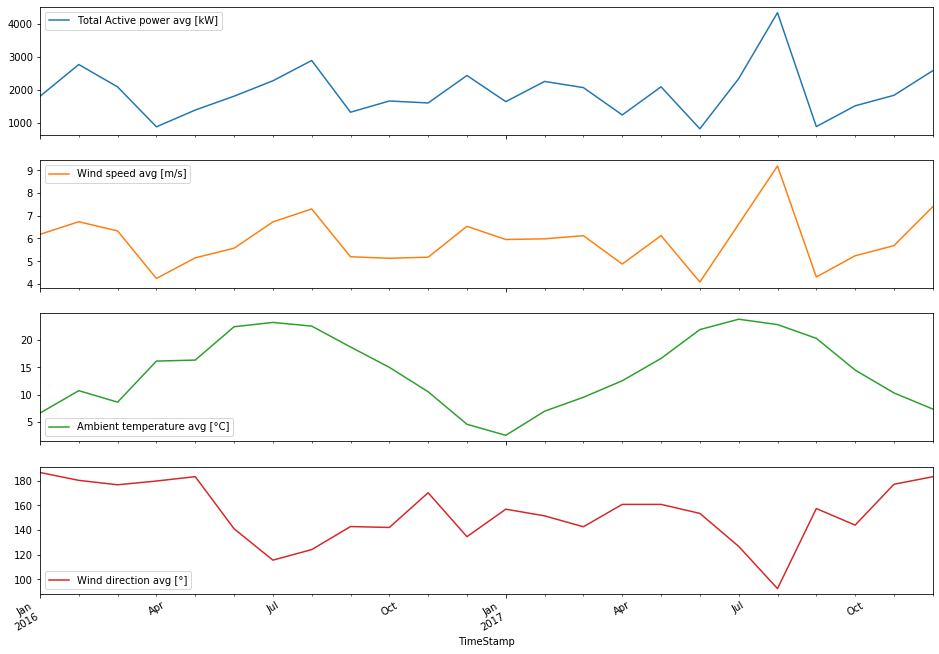

In [166]:
data['2016':'2017'].resample('M').mean().plot(figsize=(16, 12), subplots=True)

The line plots of the variables suggest that active power and wind speed are highly correlated, but further analysis is required to confirm that. The power average exhibits some seasonality, as it peaks during the summer months.

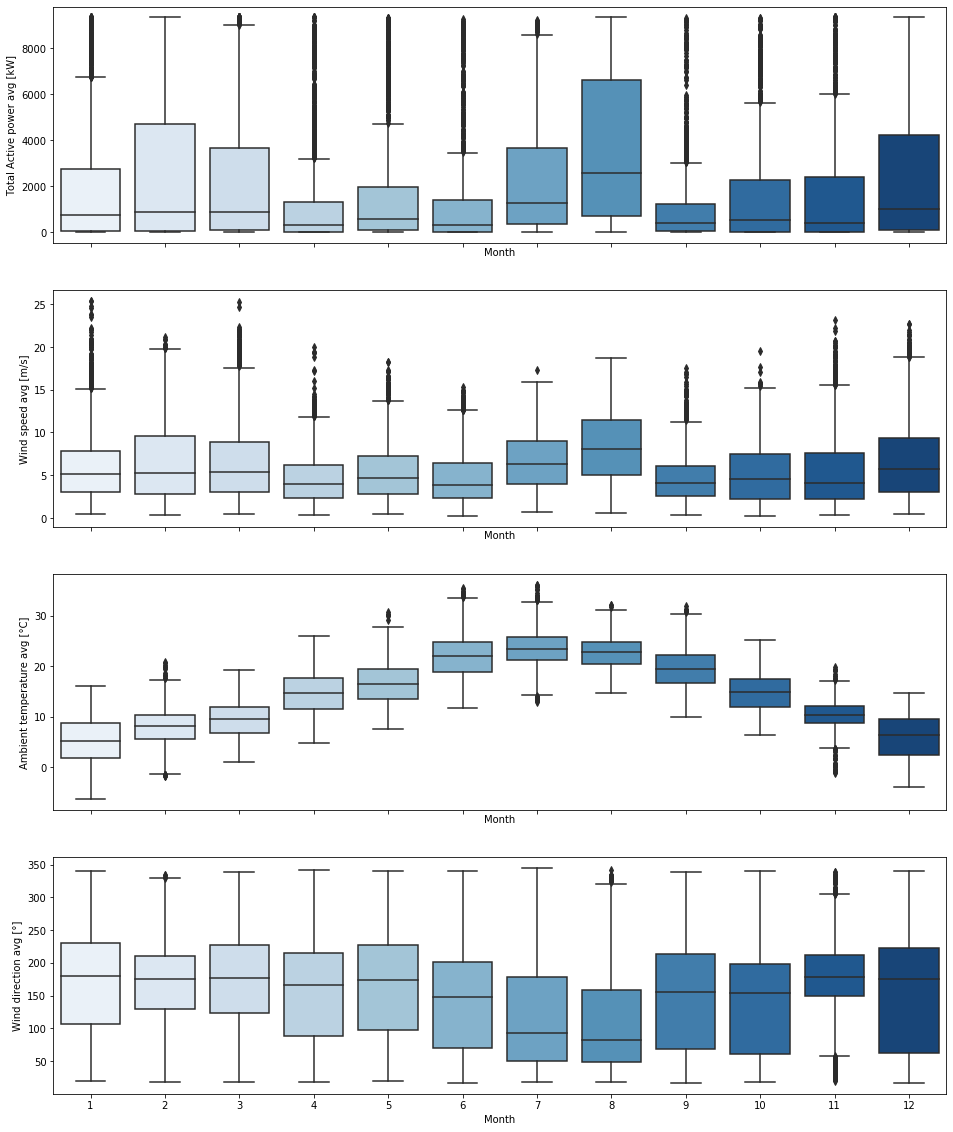

In [167]:
fig, axes = plt.subplots(4, 1, figsize=(16, 20), sharex=True)


for name, ax in zip(data.columns, axes):
    sns.boxplot(data=data, x=data.index.month, y=name, ax=ax, palette='Blues')
    ax.set_xlabel('Month')
    

The seasonality of average power and wind speed is apparent in the box plot of each variable. Ambient temperature is also highly seasonal, as it is expected.

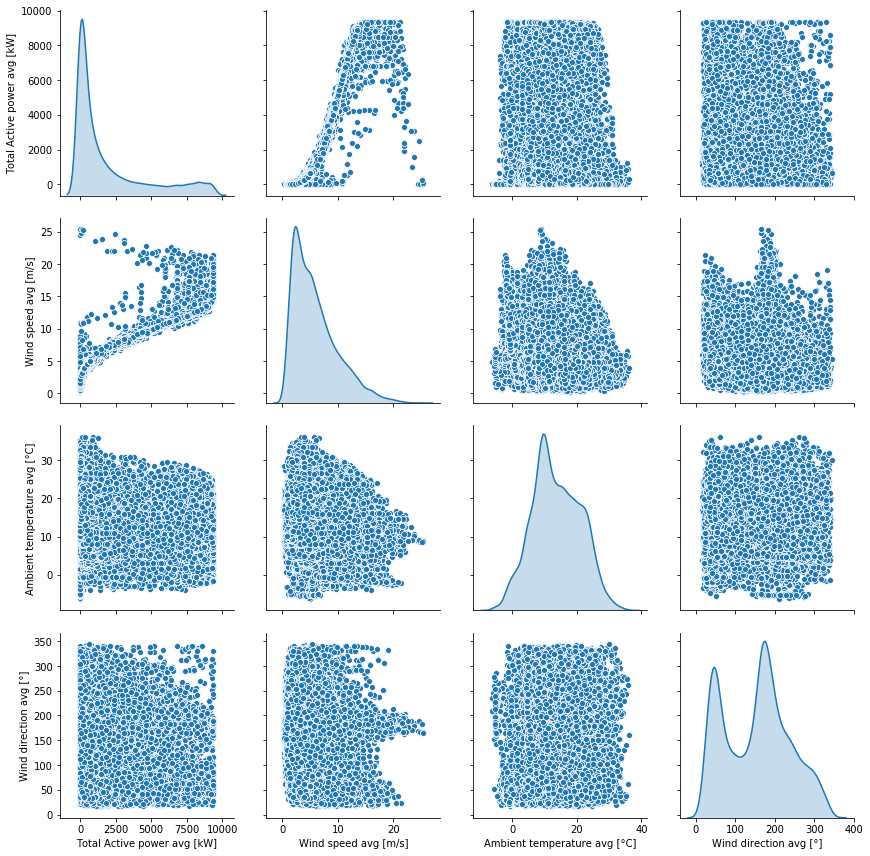

In [168]:
sns.pairplot(data, diag_kind='kde', height=3)

The scatter plot of active power and wind speed indicates that there is a strong and somewhat non-linear relation between them. There don't seem to be any other signficiant variable relations. The KDE plots suggest that active power and wind speed are right-skewed, while the distributions of ambient temperature and wind direction are close to normal.

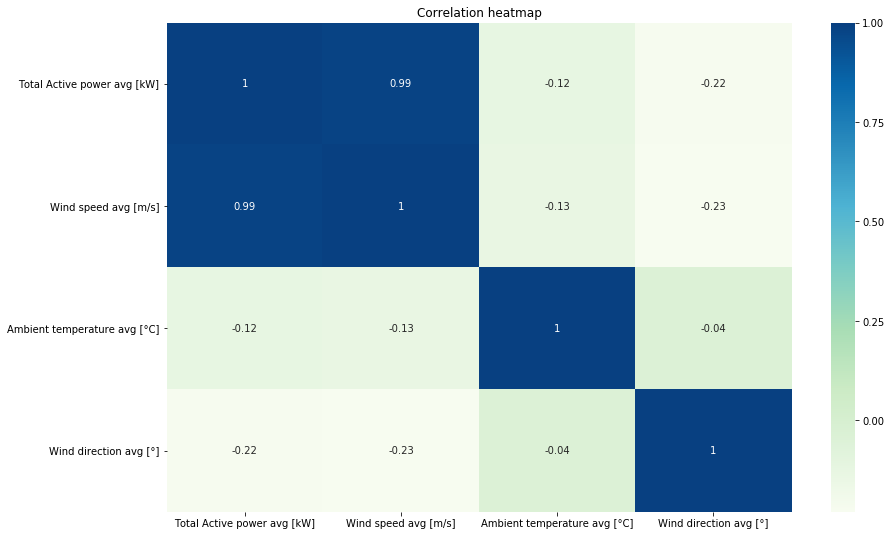

In [169]:
plt.figure(figsize=(14,9))
sns.heatmap(data.corr(method='spearman').round(decimals=2), annot=True, cmap="GnBu")
plt.title("Correlation heatmap")
plt.show()

As expected, the correlation heatmap of the data set, confirms the strong relationship between active power and wind speed. Spearman correlation was used, as it is more suitable for non-linear relationships between variables.